Michael Haugan
MSDS 453
Summer 2019

Final Project: Classifying Facebook news article with NLP and ML classification models

In [106]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import urllib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import LSTM
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

#hide tf warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf

# create corpus

In [2]:
urls = ['https://www.forbes.com/sites/zakdoffman/2019/04/18/facebook-illegally-harvested-data-from-1-5m-users-as-it-leveraged-its-data-machine/#19e47ee86a2e'
        ,'https://www.wired.com/story/facebook-security-breach-50-million-accounts/'
        ,'https://www.theguardian.com/technology/2019/mar/17/the-cambridge-analytica-scandal-changed-the-world-but-it-didnt-change-facebook'
        ,'https://techcrunch.com/2019/06/18/facebook-libra/'
        ,'https://www.wsj.com/articles/why-we-should-like-facebooks-cryptocurrency-11564151635'
        ,'https://www.nytimes.com/2019/07/24/technology/ftc-facebook-privacy-data.html'
        ,'https://www.cnbc.com/2019/07/26/how-to-control-the-ads-facebook-shows-you.html'
        ,'https://www.npr.org/2019/07/28/745949428/did-facebook-ceo-mark-zuckerberg-intend-to-deceive'
        ,'https://www.forbes.com/sites/jonmarkman/2019/07/28/facebook-ai-research-is-a-game-changer/#46296d694e96'
        ,'https://www.forbes.com/sites/kennethcorbin/2019/07/25/critics-pan-facebooks-privacy-settlement/'
        ,'https://www.forbes.com/sites/kalevleetaru/2019/07/28/why-wont-facebook-create-safe-spaces-from-political-ads/#445a0489632e'
        ,'https://www.forbes.com/sites/zakdoffman/2019/07/25/facebook-steps-up-fight-against-terrorists-using-platform-to-recruit-and-campaign/'
        ,'https://www.forbes.com/sites/mnunez/2019/07/24/facebook-sales-jump-profit-hit-by-expenses-from-5-billion-ftc-fine/#3abb16714ff0'
        ,'https://www.washingtonpost.com/technology/2019/07/25/inside-chris-hughess-campaign-break-up-facebook-tech-monopoly-he-helped-create/?noredirect=on&utm_term=.a68c16e85982'
        ,'https://digiday.com/marketing/facebooks-news-feed-ads-changing/'
        ,'https://techcrunch.com/2019/07/24/facebook-settles-with-ftc-5-billion-and-new-privacy-guarantees/'
        ,'https://www.cnbc.com/2018/04/04/mark-zuckerberg-facebook-user-privacy-issues-my-mistake.html'
        ,'https://www.forbes.com/sites/tonybradley/2017/07/31/facebook-ai-creates-its-own-language-in-creepy-preview-of-our-potential-future/#6d1868af292c'
        ,'https://www.theverge.com/2019/7/3/20681231/facebook-outage-image-tags-captions-ai-machine-learning-revealed'
        ,'https://www.nytimes.com/2019/05/17/technology/facebook-ai-schroepfer.html'
        ,'https://towardsdatascience.com/the-truth-behind-facebook-ai-inventing-a-new-language-37c5d680e5a7'
        ,'https://www.cnn.com/2019/07/16/tech/facebook-libra-crypto/index.html'
        ,'https://www.cnn.com/2019/05/11/tech/facebook-rankwave-korean-data/index.html'
        ,'https://www.cnbc.com/2019/07/19/bitcoin-vs-libra-how-facebooks-cryptocurrency-is-different.html'
        ,'https://www.theverge.com/2019/6/26/18716326/facebook-libra-cryptocurrency-blockchain-irs-starbucks'
        ,'https://www.nytimes.com/2019/07/16/technology/facebook-libra-congress.html'
        ,'https://www.kiplinger.com/article/investing/T038-C000-S002-facebook-libra-cryptocurrency.html'
        ,'https://worldview.stratfor.com/article/facebook-s-cryptocurrency-well-may-already-be-poisoned-libra-blockchain-bitcoin'
        ,'https://www.aljazeera.com/programmes/countingthecost/2019/08/facebook-libra-cryptocurrency-threat-national-economies-190809132703607.html'
        ,'https://www.latimes.com/business/story/2019-08-28/cryptocurrency-lobby-fights-to-contain-backlash-from-facebooks-libra'
        ,'https://www.washingtonpost.com/outlook/2019/08/12/facebooks-libra-cryptocurrency-is-part-disturbing-financial-trend/?noredirect=on'
        ,'https://www.consumerreports.org/digital-security/what-makes-the-facebook-data-breach-so-harmful/'
        ,'https://www.engadget.com/2019/07/24/facebook-will-pay-5-billion-fine-for-cambridge-analytica-data-b/'
        ,'https://www.vanityfair.com/news/2019/04/facebook-data-privacy-scandals-ftc'
        ,'https://terranovasecurity.com/data-privacy-scandal-facebook/'
        ,'https://www.usatoday.com/story/tech/2018/12/19/facebooks-latest-privacy-scandal-what-we-know-now/2361257002/'
        ,'https://www.forbes.com/sites/daveywinder/2019/03/17/facebook-privacy-update-mark-zuckerbergs-response-to-cambridge-analytica-scandal-one-year-on/#253dbd502198'
        ,'https://www.fastcompany.com/3067461/why-facebook-is-one-of-the-most-innovative-companies-of-2017'
        ,'https://www.theverge.com/2019/5/20/18632323/facebook-robotics-ai-research-experiments'
        ,'https://www.fastcompany.com/90352246/now-facebook-is-using-robots-to-advance-its-work-in-artificial-intelligence'
        ,'https://www.washingtonpost.com/technology/2018/07/17/facebook-boosting-artificial-intelligence-research-says-its-not-going-fast-enough/'
        ,'https://bgr.com/2019/07/05/facebook-outage-reveals-ai-catalogs-every-photo-you-upload/'
        ,'https://www.cnbc.com/2017/08/01/facebook-ai-experiment-did-not-end-because-bots-invented-own-language.html'
        ,'https://medium.com/@jamal.robinson/how-facebook-scales-artificial-intelligence-machine-learning-693706ae296f']

for url in urls:
    article = requests.get(url)
    soup = BeautifulSoup(article.text, "html.parser")
    titles = soup.title
    print(titles)
    textContent = []
    textContent = "".join([p.text for p in soup.find_all("p")])
    print(textContent)
    for title in titles:
        with open("{}article.txt".format(title), "w") as file:
            file.write(textContent)
            file.close()

<title>1.5m Users Hit By New Facebook Privacy Breach As Extent Of Data Misuse Exposed</title>
Facebook's alleged data misuse hit the headlines (again) on Thursday as Business Insider revealed that the company had "harvested the email contacts of 1.5 million users without their knowledge or consent when they opened their accounts." The privacy breach came to light when a security researcher questioned why Facebook was asking for email passwords when new users signed up with the platform. "Business Insider then discovered that if you did enter your email password, a message popped up saying it was 'importing' your contacts, without asking for permission first."In addition to the obvious data misuse implications, for a commercial platform to request a password for a separate application breaks every security protocol imaginable. Forgetting the contact details that were then harvested, such a security breach would have left the email content itself open to misuse. The irony is that this co

<title>The Cambridge Analytica scandal changed the world – but it didn't change Facebook | Technology | The Guardian</title>
A year after devastating revelations of data misuse, Mark Zuckerberg still hasn’t fulfilled his promises to reform
Julia Carrie Wong in San Francisco

Mon 18 Mar 2019 01.00 EDT


Last modified on Mon 18 Mar 2019 21.21 EDT

It can be hard to remember from down here, beneath the avalanche of words and promises and apologies and blogposts and manifestos that Facebook has unleashed upon us over the course of the past year, but when the Cambridge Analytica story broke one year ago, Mark Zuckerberg’s initial response was a long and deafening silence.It took five full days for the founder and CEO of Facebook – the man with total control over the world’s largest communications platform – to emerge from his Menlo Park cloisters and address the public. When he finally did, he did so with gusto, taking a new set of talking points (“We have a responsibility to protect your d

<title>Facebook announces Libra cryptocurrency: All you need to know – TechCrunch</title>
Facebook has finally revealed the details of its cryptocurrency, Libra, which will let you buy things or send money to people with nearly zero fees. You’ll pseudonymously buy or cash out your Libra online or at local exchange points like grocery stores, and spend it using interoperable third-party wallet apps or Facebook’s own Calibra wallet that will be built into WhatsApp, Messenger and its own app. Today Facebook released its white paper explaining Libra and its testnet for working out the kinks of its blockchain system before a public launch in the first half of 2020.Facebook  won’t fully control Libra, but instead get just a single vote in its governance like other founding members of the Libra Association, including Visa, Uber and Andreessen Horowitz, which have invested at least $10 million each into the project’s operations. The association will promote the open-sourced Libra Blockchain an

<title>Why We Should Like Facebook’s Cryptocurrency - WSJ</title>
August 29, 2019https://www.wsj.com/articles/why-we-should-like-facebooks-cryptocurrency-11564151635The ambition is grand: “Reinvent money. Transform the global economy. So people everywhere can live better lives.” So said 






            Facebook
            


       last month in unveiling Libra, its new digital payment service. The company heralded it as “a simple global currency and financial infrastructure that empowers billions of people.” If fully launched, Libra would allow Facebook users to buy and sell goods and services around the world and across borders using a digital cryptocurrency governed by a collective in Switzerland. It would be linked to but distinct from the dollar, the euro and other currencies and maintained not by a government but by the behemoth Silicon Valley tech company.The reaction from governments around the world has been swift and negative. “My determination to make sure that Facebook’

<title data-rh="true">Facebook Agrees to Extensive New Oversight as Part of $5 Billion Settlement - The New York Times</title>
AdvertisementSupported byBy Mike Isaac and Natasha SingerSAN FRANCISCO — Facebook was ordered on Wednesday to create new layers of oversight for its collection and handling of users’ data by the Federal Trade Commission, as the agency detailed a privacy settlement with the social network that became a referendum on how aggressive American regulators would be against big tech companies.Under the agreement, the F.T.C. mandated that the Silicon Valley company add new positions and practices to increase the transparency and accountability of how it treats people’s information. The agency also formally imposed a record $5 billion fine against Facebook for deceiving users about their ability to control the privacy of their personal data.Yet the measures, which the F.T.C.’s commissioners approved in a 3-to-2 vote this month, drew sharp criticism for not going far enou

<title itemprop="name">How to control the ads Facebook shows you</title>
Keep Me Logged InStocks jumped after China said it wished to resolve its protracted trade dispute with the world's largest economy with a "calm" attitude.Compared with China, India and other countries, the U.S. is way behind when it comes to the adoption of mobile payments."Let's see what the end product is; that's what you have to judge it by," Trump said.Three Senate Democrats sent a letter to Amazon urging the company to do something about the thousands of unsafe or banned products listed on the e-commerce site."Trade is not the problem — Trump is," Democratic presidential candidate and former Rep. Beto O'Rourke said in releasing his trade policy.The Yankees and Sinclair Broadcast Group are also among the members of the investor group.See which stocks are posting big moves after the bell.Shares of Ulta Beauty tanked 21% after the company reported earnings after the bell Thursday that missed analysts' expectatio

<title>Facebook AI Research Is A Game-Changer</title>
For decades, computer programmers have been trying to beat multiplayer games by finding reliable patterns in data.Researchers at Facebook and Carnegie Mellon University published a whitepaper in Science Journal in July that flips this switch. Their software embraces randomness, and it is reliably beating humans at games.Smart bearded person in a classic gray suit is playing poker at casino in smoke sitting at the table with chips and cards on it . He is holding a glass of whiskey in his hand and looking away. Gambling addiction. Sincere emotions and entertainment concept.This is a big step forward for data science. It shows where the world is headed.By now, investors should know that machine learning and artificial intelligence have taken the enterprise world by storm. Companies like Alphabet, Amazon and Netflix built huge platforms in internet search, ecommerce and media distribution by using software algorithms to understand what 

<title>Why Won't Facebook Create 'Safe Spaces' From Political Ads?</title>
Getty ImagesSilicon Valley has been a leading proponent of the idea of so-called “safe spaces” in colleges and businesses in which dedicated rooms are established where students and employees can go to get away from viewpoints, information and mentions that distress them or triggers past trauma. In the aftermath of the 2016 election, news relating to the new administration and its policies were a common refrain in the call for more safe spaces. At the same time, Silicon Valley’s social media platforms saturate those same vulnerable individuals with ceaseless political ads that are impossible to escape. Why don’t platforms like Facebook allow users to opt-out of political advertisements, creating digital safe spaces from content that triggers them?In our ever more hyper-partisan world in which differing viewpoints and information that conflicts with one’s viewpoints and beliefs or which touches upon past traumati

<title>Facebook Takes Action As Terrorists Found Using Platform To Recruit And Campaign</title>
"When terrorists misuse the internet," Facebook explained in a blog post on Wednesday, July 24, "they often upload the same piece of content to multiple platforms to maximize their reach." This has allowed the social media giant—along with Google, Microsoft and Twitter under the Global Internet Forum to Counter Terrorism (GIFCT) alliance—to "more quickly identify and take action against potential terrorist content on our respective platforms."In 2018, the alliance reached its intended milestone of assembling 100,000 such hashes. In the first half of 2019, though, the number has already doubled. There are now "more than 200,000 unique hashes in the database," each of which is described as a digital fingerprint pointing to a known piece of terrorist content.The scale speaks for itself, as does news from the frontline.Israel's internal security agency Shin Bet accused Iran this week of sponsori

<title>Facebook cofounder Chris Hughes is now lobbying to break up the social media giant - The Washington Post</title>
SAN FRANCISCO — Facebook co-founder Chris Hughes has become one of the company’s biggest problems.In recent weeks, Hughes, who left the social media giant in 2007 and cashed out his nearly $500 million worth of stock, has been making the rounds in the nation’s capital, visiting a dozen lawmakers and regulators at the Justice Department, the Federal Trade Commission and other agencies interested in examining whether Facebook has amassed too much power. He’s talked with the staff of the New York attorney general.In some of those meetings, he and his collaborators have presented a 39-page slide deck that makes a point-by-point legal case for breaking up the social network, drawing on decades of antitrust law precedent.The crux of the case, designed by two antitrust scholars: Facebook’s wealth and power and massive user base have pushed it into monopoly territory, and its

<title>Facebook’s News Feed ads are changing - Digiday</title>
Facebook will soon tweak the creative restrictions to ads in its mobile News Feed. The changes will shrink the amount of text and the image size, which marketers say should improve ad copy overall but would be burdensome.Facebook ads placed in mobile will only show three lines of text, compared to the seven that could previously be viewed. Facebook users can click to show more. Photos and videos will have a 4:5 aspect ratio, at most, compared to the previous 2:3. These upcoming changes were first revealed by Susan Wenograd, vp of marketing strategy at agency Aimclear, and confirmed by digital marketer David Herrmann. The new restrictions will start to be applied Aug. 19, Wenograd said.These moves come as Facebook ads become more expensive, especially in the News Feed, and more advertisers join Facebook. The company recently touted its new milestone of supporting 7 million active advertisers. Facebook chief operating officer

<title itemprop="name">Mark Zuckerberg: Facebook user privacy issues 'my mistake'</title>
Keep Me Logged InStocks jumped after China said it wished to resolve its protracted trade dispute with the world's largest economy with a "calm" attitude.Compared with China, India and other countries, the U.S. is way behind when it comes to the adoption of mobile payments."Let's see what the end product is; that's what you have to judge it by," Trump said.Three Senate Democrats sent a letter to Amazon urging the company to do something about the thousands of unsafe or banned products listed on the e-commerce site."Trade is not the problem — Trump is," Democratic presidential candidate and former Rep. Beto O'Rourke said in releasing his trade policy.The Yankees and Sinclair Broadcast Group are also among the members of the investor group.See which stocks are posting big moves after the bell.Shares of Ulta Beauty tanked 21% after the company reported earnings after the bell Thursday that missed ana

<title>Facebook’s image outage reveals how the company’s AI tags your photos - The Verge</title>
Filed under:‘Oh wow, the AI just tagged my profile picture as basic’Everyone knows the bit in The Matrix when Neo achieves digital messiah status and suddenly sees “reality” for what it really is: lines of trailing green code. Well, thanks to an outage currently affecting Facebook, users of the social network have been given a similar peek behind the digital curtain, with many images on the site now replaced with the tags they’ve been assigned by the company’s machine vision systems. So if you browse through your uploaded photos, instead of seeing holiday snaps or pictures of food and friends, you’ll be shown text saying things like “image may contain: people smiling, people dancing, wedding and indoor” or just “image may contain: cat.” In short: this is how your life looks to a computer. This is how Facebook’s AI is judging you. Do you feel ashamed before the all-seeing digital eye?!Oh yea

<title data-rh="true">The truth behind Facebook AI inventing a new language</title>
There have been so many articles published about Facebook shutting down its robots after they developed their own language. The media is just loving these clickbait titles. Some of these articles would let you believe that this was a very close call — that scientists at Facebook barely shut down the AI before it could take over the world. Fortunately, there are still sane people out there, so there have been quite a few articles explaining why all of the doomsday talk is complete nonsense (like the ones published by Snopes or CNBC). Even some of the media that originally offered a very scandalous version of this event eventually edited the content to be less dramatic (like The Independent for example).The problem is that false but catchy news is much easier to spread than anything else. I also find it curious that none of the articles actually explained what happened in terms that people would understan

<title>Facebook Libra: Everything to know about the cryptocurrency - CNN</title>
By Clare Duffy, CNN BusinessUpdated 3:02 PM ET, Tue July 16, 2019 Chat with us in Facebook Messenger. Find out what's happening in the world as it unfolds.New York (CNN Business)Facebook's Libra cryptocurrency could change global commerce and finance, becoming a new way for people to send money and pay for things. 
<title>Facebook's latest controversy has echoes of Cambridge Analytica scandal - CNN</title>
By Donie O'Sullivan, CNN BusinessUpdated 4:44 PM ET, Sat May 11, 2019 Chat with us in Facebook Messenger. Find out what's happening in the world as it unfolds.New York (CNN)Facebook sued a South Korean company on Friday for alleged misuse of Facebook data.
<title itemprop="name">Bitcoin vs Libra: How Facebook's cryptocurrency is different</title>
Keep Me Logged InStocks jumped after China said it wished to resolve its protracted trade dispute with the world's largest economy with a "calm" attitude.Compar

<title>Facebook’s cryptocurrency Libra, explained - The Verge</title>
Filed under:Move fast and bank thingsWhat is Libra?It’s an excellent book by Don DeLillo, the American master. Published in 1988, it is a fictional account of the life of Lee Harvey Oswald, President John F. Kennedy’s eventual assassin. It’s better than White Noise but not as good as Underworld.Liz.Fine. It’s Facebook’s new cryptocurrency. The point is that you can send money all over the world with lower fees than if you were to engage, say, Western Union.It’s shady as hell, though. You remember Tyler and Cameron Winklevoss? The twins from whom Mark Zuckerberg ripped the initial idea for Facebook? Yeah, so they have a cryptocurrency exchange called Gemini. As any astrology buff will tell you, both Libra and Gemini are air signs, and Geminis are stereotypically scarier than Libras. Gemini is the sign of twins and is associated with two-faced-ness. Plus, it’s a mutable air sign, which makes it somewhat unstable. Libra

<title data-rh="true">Facebook Cryptocurrency Plans Have a Problem: Facebook’s Reputation - The New York Times</title>
AdvertisementSupported byBy Mike Isaac and Nathaniel PopperLawmakers made it clear at a Senate Banking Committee hearing on Tuesday that they believe the biggest roadblock to Facebook’s plan to enter the world of cryptocurrency and global finance is the company’s reputation.Facebook’s cryptocurrency project, Libra, has been in the works for more than a year. It has an ambitious goal: to offer an alternative financial system that makes it possible to send money around the world with few fees.But almost immediately, the company has run into resistance from Washington.“Facebook is dangerous,” Senator Sherrod Brown, Democrat of Ohio, said at the hearing. “Facebook has said ‘just trust us.’ And every time Americans trust you, they seem to get burned.”The initiative is far from the first effort of its kind. The best-known cryptocurrency, Bitcoin, is in wide circulation, and 

<title>For Facebook’s Cryptocurrency, the Well May Already Be Poisoned</title>
assessmentsAug 15, 2019 | 09:30 GMTIn June, Facebook made waves when it confirmed it was planning to launch its own cryptocurrency in 2020. Called Libra, the system will be connected to Facebook's massive user base, granting it the immediate potential of rivaling such established systems as Google Pay and PayPal. Indeed, Libra hopes to become the world's most widely adopted digital currency — sparking the kind of economic revolution that cryptocurrency has long promised, but has so far largely failed to deliver. Unlike other digital coins, however, Libra's main barrier to success won't be its technology, but its image.The privacy concerns associated with Facebook, along with the general skepticism associated with notoriously volatile cryptocurrencies like Bitcoin, are hardly relevant to Libra's platform and functionality. But that won't erase regulators' prejudices. Libra's ability to enamor and educate alre

<title>Facebook's Libra cryptocurrency: A threat to national economies? | USA | Al Jazeera</title>
Most Searched10 Aug 2019 10:53 GMT Business & Economy, United States, China, Facebook, CryptoWith the likes of Amazon, Google's parent company Alphabet and Facebook becoming the world's most valuable listed companies, Big Data is quickly becoming the world's most important commodity. Meanwhile, regulators are scrambling to keep up with the changing environment.The newest tech initiative - and one causing some concern - is Facebook's plan to introduce a new digital currency, Libra.A cryptocurrency used by the social network's two billion users could effectively create a new world currency, perhaps even rivalling the dollar, yuan or euro.However, given that Facebook has in the past abused data it has on billions of people, many in policy circles are opposing the cryptocurrency on the grounds that it is also a threat to national economies.The loss of sovereignty is a huge concern for the lik

<title>Why the Facebook Data Breach Is So Harmful - Consumer Reports</title>

                    We respect your privacy.
                    All email addresses you provide will be used just for sending this story.
                The Facebook data breach that affected almost 30 million users last month was different from other recent data breaches in a way that concerns security and privacy experts—and should worry consumers, as well.
It’s not just the sheer size that made the Facebook attack notable. Massive incidents such as the Equifax breach from last September were bigger. What's unusual is the kind of data exposed."It turns out the Facebook attack was worse than we thought—the fact that very sensitive data was exfiltrated from about 15 million users is staggering," says Justin Brookman, director of privacy and technology policy for Consumers Union, the policy and mobilization division of Consumer Reports.The stolen data included religion, gender, relationship status, birthdate

<title>Facebook will pay $5 billion fine for Cambridge Analytica data breaches</title>
The Federal Trade Commission has announced that Facebook will pay a massive fine in the wake of the Cambridge Analytica scandal. The social network will pay $5 billion to settle the charge that it broke a 2012 FTC order concerning the privacy of user data. And, as part of the settlement, Facebook has had to agree to a new management structure and new rules about how it manages user data.Facebook, now subject to a 20-year settlement order, will have to create a new independent privacy committee. A group of Facebook directors will meet, every quarter, to receive reports from an independent privacy "assessor," who will monitor Facebook's actions. The FTC has also put in place rules to prevent CEO Mark Zuckerberg, who has majority control of the company, from single-handedly dismissing them.The social network (including WhatsApp and Instagram) will also be bound by new reporting rules on disclosing priva

<title>403 Forbidden</title>

<title>Facebook's latest privacy scandal: What we know now</title>
SettingsCancelSetHave an existing account?Already have a subscription?Don't have an account?Get the newsLet friends in your social network know what you are reading aboutAnother day, another Facebook privacy scandal. The latest: According to The New York Times Facebook gave tech companies special access to user's data.A link has been sent to your friend's email address.A link has been posted to your Facebook feed. To find out more about Facebook commenting please read the Conversation Guidelines and FAQs
                                            This conversation is moderated according to USA TODAY's
                                            community rules.
                                            Please read the rules before joining the discussion.
                                        
    It's another instance of Facebook sharing user information, this time through data sharing

<title>Facebook Privacy Update: Mark Zuckerberg's Response To Cambridge Analytica Scandal One Year On</title>
Facebook CEO Mark Zuckerberg appears on a television screen on the floor of the New York Stock Exchange as he testifies in the Senate in Washington.(AP Photo/Richard Drew, File)As fresh allegations of an executive-level cover up at Facebook regarding who knew what and when emerge, the one year anniversary of the Cambridge Analytica scandal when investigative journalists revealed the company had been harvesting personal data from 87 million Facebook profiles for political campaigning purposes has arrived. This comes a day after the academic, Aleksandr Kogan, whose quiz app was central to the allegations of data hoovering, sued the social network for defamation. All of which leaves me wondering what, if anything, Mark Zuckerberg has learned from this, the most turbulent year in the history of Facebook?Facebook was engulfed in a veritable tidal wave of privacy-driven angst at the 

<title>Facebook is experimenting with robots to push its AI research forward - The Verge</title>
Filed under:But don’t expect to see any Facebook robots on sale Facebook is certainly a high-tech company, but it’s not one you would necessarily associate with robots. However, as the firm revealed today, that’s exactly where its researchers are looking next — trying to see how experiments in robotics can further its work in AI.This isn’t uncommon for big tech companies. A lot of firms, including Google, Nvidia, and Amazon, use robots as a platform to explore avenues of AI research. Controlling robots is, in many ways, trickier than challenges like playing board games and video games. With these latter tasks, researchers have access to simulated game environments, which allows AI agents to play and learn at accelerated speeds. There’s no such shortcut for training robots.“The great thing about robotics is that it takes place in real time, in the real world,” Facebook’s Antoine Bordes, co-m

<title>Facebook uses AI to analyze and catalog every single photo you upload – BGR</title>
A Facebook outage that also affected Instagram and WhatsApp on Thursday revealed what may be a surprising development to some Facebook users: the company uses artificial intelligence (AI) to catalog the contents of every photo you upload to its servers. Every. Single. Photo.Don't Miss: Apple Watch Series 4 Labor Day sale brings back Prime Day’s low pricesDuring the Facebook outage, photos took longer to load than anything else, which made it clear to anyone logging into Facebook, Instagram, or WhatsApp that Facebook’s AI does in fact analyze and catalogs photos:FB's broken AI photo recognition tool left one person out. It's either me or Judas pic.twitter.com/L7bB4uC7tZ— Ruben Salvadori (@ruben_salvadori) July 3, 2019It might not be perfect or super sophisticated, but it works for Facebook’s needs.This is hardly a secret from a company that has been trying to convince you to use tagging and facial

In [3]:
import os
import glob
import pandas as pd

def retrieve_document(file_path):
    """Return text as a string for a given txt file path."""
    with open(file_path, 'r', encoding='utf-8') as document:
        lines = document.readlines()
    text = ''.join(lines)
    return text

In [ ]:
def main():
    """Create corpus as a CSV file."""
    # Generate list of text file paths
    path_list = glob.glob('./453Corpus/*.txt')
    # Generate list of text file names
    file_list = [os.path.basename(i) for i in path_list]

    # Generate list of text file content
    text_list = []
    for text_file in path_list:
        text_list.append(retrieve_document(text_file))

    # Create dictionary for corpus
    corpus = {'Doc_Title': file_list, 'Text': text_list}
    # Generate a CSV of the corpus
    pd.DataFrame(corpus).to_csv('./corpus.csv', index=file_list)
    
if __name__ == "__main__":
    main()

# clean words

In [4]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity


def clean_doc(doc):
    """Return processed tokens for a given document."""
    # Split into "words"
    tokens = doc.split()
    # Remove punctuation
    re_punc = re.compile(f"[{re.escape(string.punctuation)}]")
    tokens = [re_punc.sub('', word) for word in tokens]
    # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    # Remove short tokens
    tokens = [word for word in tokens if len(word) > 4]
    # Make tokens lowercase
    tokens = [word.lower() for word in tokens]
    # Remove stop words
    stop_words = nltk.corpus.stopwords.words('english')
    stop_words.append("would")
    tokens = [word for word in tokens if word not in stop_words]
    # lemmatization for plurals      
    lem = WordNetLemmatizer()
    tokens = [lem.lemmatize(token) for token in tokens]
    return tokens

# read in corpus

In [19]:
# read in corpus
text_data = pd.read_csv('./corpus.csv')

text_titles = text_data['Doc_Title'].tolist()
text_bodies = text_data['Text'].tolist()

text_data['category']

0        privacy
1     innovation
2     innovation
3         crypto
4     innovation
5        privacy
6        privacy
7     innovation
8         crypto
9     innovation
10       privacy
11        crypto
12    innovation
13    innovation
14    innovation
15       privacy
16        crypto
17       privacy
18    innovation
19       privacy
20        crypto
21    innovation
22    innovation
23       privacy
24       privacy
25    innovation
26       privacy
27       privacy
28        crypto
29        crypto
30       privacy
31       privacy
32        crypto
33       privacy
34       privacy
35       privacy
36        crypto
Name: category, dtype: object

In [13]:
# clean words and create list of tokens
processed_text = []
for document in text_bodies:
    processed_text.append(clean_doc(document))

In [14]:
# stitch document back together (after cleaning)
final_processed_text = []
for i, _document in enumerate(processed_text):
    final_processed_text.append(" ".join(processed_text[i]))  

In [15]:
#Note: We stitched the processed text together so the TFIDF vectorizer can work.
#Final section of code has 3 lists used.  2 of which are used for further processing.
#(1) text_body - unused
#(2) processed_text (used in W2V)
#(3) final_processed_text (used in TFIDF)
#(4) DSI titles (used in TFIDF Matrix)

# run TF-IDF

In [130]:
# run tfidf (prevalent - require 25% of docs)
tfidf = TfidfVectorizer(ngram_range=(1, 4), min_df=0.25)
tfidf_matrix = tfidf.fit_transform(final_processed_text)
matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names(), index=text_titles)
matrix.head()

,ability,access,according,account,action,actually,agency,allow,allowed,already,...,user,using,video,whether,within,without,working,world,year,zuckerberg
Facebook's Massive Security Breach: Everything We Know | WIREDarticle.txt,0.0000,0.104513,0.037421,0.427532,0.074843,0.0,0.040438,0.038867,0.038867,0.031546,...,0.156261,0.000000,0.080875,0.000000,0.038867,0.083768,0.036083,0.026352,0.000000,0.067345
Facebook’s A.I. Whiz Now Faces the Task of Cleaning It Up. Sometimes That Brings Him to Tears. - The New York Timesarticle.txt,0.0248,0.000000,0.045900,0.023836,0.000000,0.0,0.000000,0.000000,0.023836,0.000000,...,0.041071,0.035279,0.223197,0.019979,0.000000,0.017125,0.022129,0.016161,0.112487,0.206507
Facebook AI Creates Its Own Language In Creepy Preview Of Our Potential Futurearticle.txt,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.049131,0.000000,0.111295,0.000000,0.047696,0.000000,0.045013,0.052217,0.000000
Facebook's Libra Cryptocurrency: What You Should Knowarticle.txt,0.0000,0.000000,0.000000,0.050469,0.000000,0.0,0.000000,0.100938,0.000000,0.020482,...,0.101454,0.000000,0.000000,0.021152,0.000000,0.000000,0.000000,0.017109,0.039696,0.000000
Facebook’s image outage reveals how the company’s AI tags your photos - The Vergearticle.txt,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.147650,0.063415,0.089155,0.215479,0.000000,0.000000,0.000000,0.116199,0.067399,0.000000


In [129]:
# measure importance by the 80th percentile and sort by importance
matrix['imp_value'] = matrix.quantile(0.8, axis=1)
matrix.sort_values(by=['imp_value'], axis=0, inplace=True, ascending=False)

# print most important and prevalent terms
print(matrix.index.tolist()[0:10])

# correlation of TFIDF values for the top terms
correlation = matrix[0:10].T.corr()

['facebook', 'company', 'libra', 'privacy', 'zuckerberg', 'platform', 'user', 'social', 'digital', 'information']


In [131]:
# explor tfidf values
average_tfidf = {}
for i in matrix.columns:
    average_tfidf[i] = np.mean(matrix[i])
    
average_tfidf_df = pd.DataFrame(average_tfidf, index=[0]).T

average_tfidf_df.columns = ['TFIDF']

# calc Q1 and Q3 range
Q1 = np.percentile(average_tfidf_df, 25)
Q3 = np.percentile(average_tfidf_df, 75)
IQR = Q3 - Q1
outlier = Q3+(1.5*IQR)

outlier_list = average_tfidf_df[average_tfidf_df['TFIDF'] >= outlier]
outlier_list

,TFIDF
billion,0.058088
company,0.153825
currency,0.059503
facebook,0.269481
libra,0.145359
platform,0.073060
privacy,0.108454
social,0.066198
user,0.073695
zuckerberg,0.074153


# k-means

In [132]:
k=3
km = KMeans(n_clusters=k, random_state=89)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [133]:
terms = tfidf.get_feature_names()
Dictionary = {'Doc Name':text_titles, 'Cluster':clusters,  'Text': final_processed_text}
frame = pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])
frame = pd.concat([frame, text_data['category']], axis=1)
frame['record']=1

In [134]:
# create pivot table
pivot = pd.pivot_table(frame, values='record', index='category', columns='Cluster', aggfunc=np.sum)
pivot

Cluster,0,1,2
category,,,
crypto,9.0,NaN,NaN
innovation,NaN,1.0,11.0
privacy,NaN,13.0,3.0


In [38]:
frame.head(n=50)

,Cluster,Doc Name,Text,category,record
0,1,Facebook's Massive Security Breach: Everything...,million facebook user possibly million hacker ...,privacy,1
1,2,Facebook’s A.I. Whiz Now Faces the Task of Cle...,facebook heralded artificial intelligence solu...,innovation,1
2,2,Facebook AI Creates Its Own Language In Creepy...,british scientist stephen hawking warned poten...,innovation,1
3,0,Facebook's Libra Cryptocurrency: What You Shou...,august personal finance social medium giant fa...,crypto,1
4,2,Facebook’s image outage reveals how the compan...,filed tagged profile picture know matrix achie...,innovation,1
5,1,Facebook's Data-Privacy Scandals Will Come at ...,already subscriber article leftsign inalready ...,privacy,1
6,2,Facebook Takes Action As Terrorists Found Usin...,terrorist misuse internet facebook explained w...,privacy,1
7,2,Facebook is using robots to advance its work i...,book movie music show inspiring creative peopl...,innovation,1
8,0,Facebook’s Libra cryptocurrency is part of a d...,facebook announced plan effectively create cur...,crypto,1
9,2,Facebook AI experiment did NOT end because bot...,artificial intelligence researcher recent spea...,innovation,1


In [39]:
print("Top terms per cluster:")

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms_dict = []
cluster_terms = {}
cluster_title = {}

for i in range(k):    
    print("Cluster %d:" % i),    
    temp_terms = []    
    temp_titles = []    
    for ind in order_centroids[i, :10]:        
        print(' %s' % terms[ind])        
        terms_dict.append(terms[ind])        
        temp_terms.append(terms[ind])    
    cluster_terms[i] = temp_terms    
    print("Cluster %d titles:" % i, end = '')    
    temp = frame[frame['Cluster'] == i]    
    for title in temp['Doc Name']:        
        print(' %s,' % title, end = '')        
        temp_titles.append(title)    
        cluster_title[i] = temp_titles

Top terms per cluster:
Cluster 0:
 libra
 currency
 cryptocurrency
 facebook
 financial
 money
 company
 global
 service
 market
Cluster 0 titles: Facebook's Libra Cryptocurrency: What You Should Knowarticle.txt, Facebook’s Libra cryptocurrency is part of a disturbing financial trend - The Washington Postarticle.txt, Facebook's Libra cryptocurrency: A threat to national economies? | USA | Al Jazeeraarticle.txt, Facebook’s cryptocurrency Libra, explained - The Vergearticle.txt, Facebook announces Libra cryptocurrency: All you need to know – TechCruncharticle.txt, For Facebook’s Cryptocurrency, the Well May Already Be Poisonedarticle.txt, Why We Should Like Facebook’s Cryptocurrency - WSJarticle.txt, Facebook Cryptocurrency Plans Have a Problem: Facebook’s Reputation - The New York Timesarticle.txt, Bitcoin vs Libra: How Facebook's cryptocurrency is differentarticle.txt,Cluster 1:
 facebook
 privacy
 company
 zuckerberg
 cambridge
 billion
 information
 analytica
 security
 user
Cluster 

# plot clusters

No handles with labels found to put in legend.


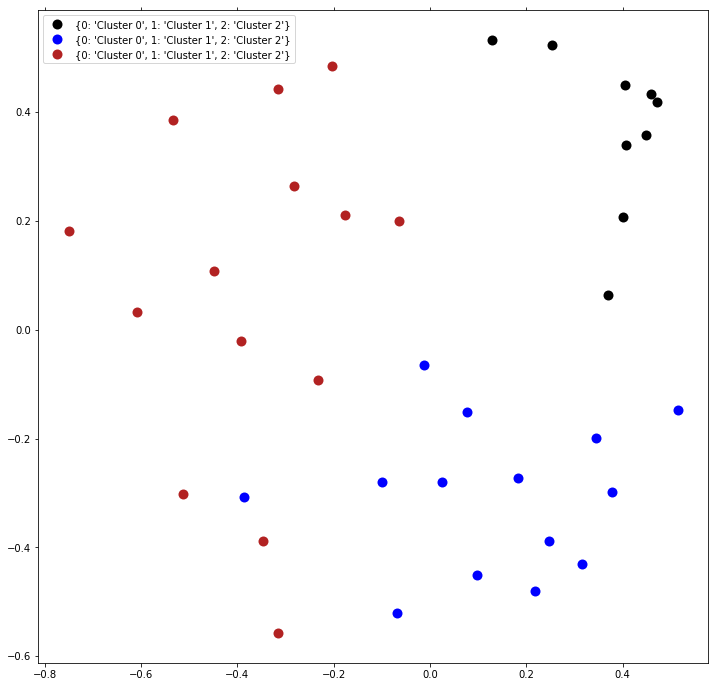

In [46]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

dist = 1 - cosine_similarity(tfidf_matrix)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]


#set up colors per clusters using a dict.  number of colors must correspond to K
cluster_colors = {0: 'black', 1: 'blue', 2: 'firebrick'}

cluster_labels = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}

#set up cluster names using a dict.  
cluster_dict=cluster_title

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters)))) 

#group by cluster
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(12, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
plt.legend(fontsize = 'x-large')

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10,
            label=cluster_labels, color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='on')

ax.legend() 

# run classifiers

In [63]:
y = clusters
X = tfidf_matrix

In [66]:
model_rf = RandomForestClassifier()
cv_score = cross_val_score(model_rf, X, y, cv=10)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklea

In [67]:
np.mean(cv_score)

0.8066666666666666

In [82]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=23)

In [96]:
# grid search
rfc_param_grid = { 
    'max_depth' : [1,5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,3,7]
}

In [97]:
# run GridSearchSV
rfc = RandomForestClassifier(max_features='sqrt', bootstrap=True, n_estimators=10, random_state=23, n_jobs=-1)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=-1,
                                              oob_score=False, random_state=23,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_de

In [99]:
# find best params
CV_rfc.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [100]:
rfc = RandomForestClassifier(max_features='sqrt', bootstrap=True, max_depth=5, min_samples_leaf=1,
                        min_samples_split=5, n_estimators=500, random_state=23, n_jobs=-1)

rfc.fit(x_train, y_train) 

# run 5 fold cv
cv_rfc = cross_val_score(rfc, x_train, y_train, cv=5, scoring="accuracy")
cv_rfc

array([0.85714286, 0.85714286, 0.8       , 1.        , 1.        ])

In [110]:
# predict y's from training set
y_pred = cross_val_predict(rfc, x_train, y_train, cv=5)

In [111]:
# create confusion matrix
confusion_matrix(y_train, y_pred)

array([[ 4,  0,  1],
       [ 0, 10,  2],
       [ 0,  0, 12]])

In [112]:
# compute f1 score
f1_score(y_train, y_pred, average="macro")

0.8956228956228957